# House prices prediction


In [364]:
#Libraries import
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(color_codes=True)
pd.set_option('display.max_columns',None)

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

print('Libraries successfully imported')

Libraries successfully imported


In [343]:
#importing the data
data = pd.read_csv('data.csv')

In [344]:
#EDA
print('SHAPE OF THE DATA')
print(data.shape)
print('\n')
print('COLUMN NAMES')
print(data.columns)

SHAPE OF THE DATA
(4600, 18)


COLUMN NAMES
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [345]:
#EDA 2
print('5 FIRST ROWS')
print(data.head())
print('\n' * 3)
print('RANDOM SAMPLE')
print(data.sample(n=5))

5 FIRST ROWS
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated          

In [346]:
# EDA 3
print('INFORMATION')
print(data.info())
print('\n' * 3)
print('DESCRIPTION')
print(data.describe())

INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB
None




DESCRIPTION
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.0

In [347]:
#From EDA we see that we need to:
#1 Convert date into date object
data.date = pd.to_datetime(data.date)
#2 Convert waterfront to categorical variable
data.waterfront = data.waterfront.astype('category')
#3 Convert city to categorical variable
data.city = data.city.astype('category')
#4 Separate zip and state and convert state to categorical variable
data[['state','zip']] = data.statezip.str.split(expand=True)
data.zip = data.zip.astype('int64')
#5 Join living expence index column to 'data'
#the below file is obtained from insure.com 
#comparing prices of living between neighbourhoods
living_expence_index = pd.read_csv('zips.csv')
data = pd.merge(data,living_expence_index,on='zip',how='inner')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 21 columns):
date                    4600 non-null datetime64[ns]
price                   4600 non-null float64
bedrooms                4600 non-null float64
bathrooms               4600 non-null float64
sqft_living             4600 non-null int64
sqft_lot                4600 non-null int64
floors                  4600 non-null float64
waterfront              4600 non-null category
view                    4600 non-null int64
condition               4600 non-null int64
sqft_above              4600 non-null int64
sqft_basement           4600 non-null int64
yr_built                4600 non-null int64
yr_renovated            4600 non-null int64
street                  4600 non-null object
city                    4600 non-null category
statezip                4600 non-null object
country                 4600 non-null object
state                   4600 non-null object
zip                     4600 n

In [348]:
#Exploring new data

print('COST OF LIVING INDEX AND PRICE CORRELATION')
print([np.corrcoef(data['cost of living index'],data['price'])],2*'\n')

ind_dist=data['cost of living index'].value_counts().to_frame(name = 'count').reset_index()
print(ind_dist,2*'\n')

ind_vs_price = data[['cost of living index','price']].groupby('cost of living index').mean().round().sort_values(by='cost of living index').reset_index()
print(ind_vs_price)




COST OF LIVING INDEX AND PRICE CORRELATION
[array([[ 1.        , -0.02451742],
       [-0.02451742,  1.        ]])] 


    index  count
0  1.0000   1864
1  0.9981    784
2  1.0006    575
3  0.9987    515
4  0.9994    347
5  1.0013    223
6  0.9974    174
7  1.0026     67
8  1.0019     49
9  0.6989      2 


   cost of living index     price
0                0.6989  285000.0
1                0.9974  637903.0
2                0.9981  734920.0
3                0.9987  587132.0
4                0.9994  610307.0
5                1.0000  550673.0
6                1.0006  381991.0
7                1.0013  274566.0
8                1.0019  263912.0
9                1.0026  251921.0


From correlation coefficient we see that the new feature doesn't have much linear correlation however there may be a significant non linear correlation which Regression Tree models can comprehend. The later significance for the model will be determined on the model building step.

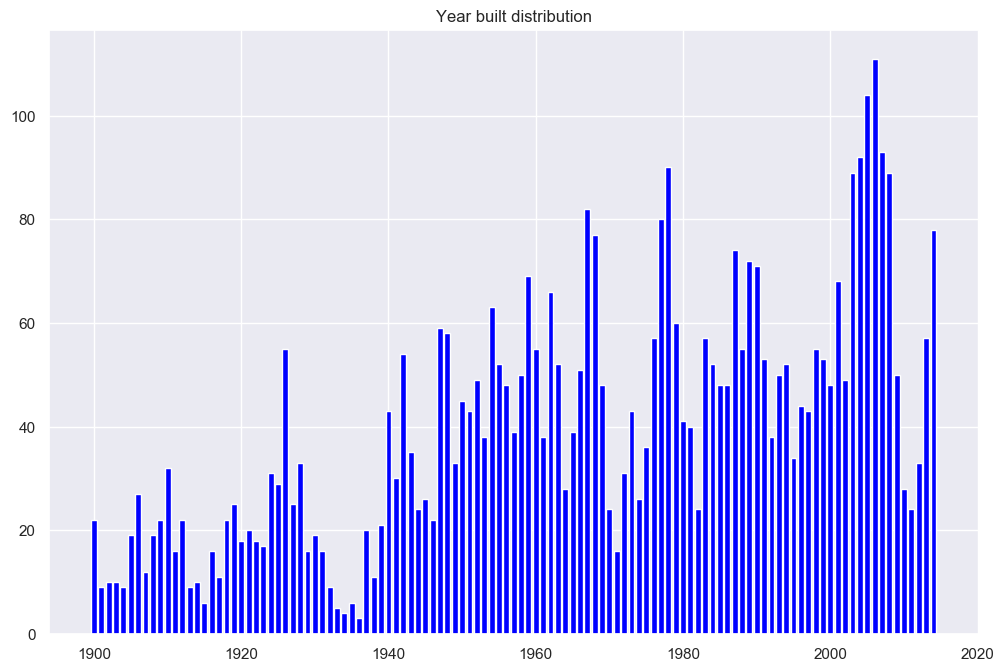

In [368]:
#Exploring yet further in visual EDA of year_built feature
#plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
yr_blt_val_count = data.yr_built.value_counts()
plt.bar(yr_blt_val_count.index,yr_blt_val_count.values,color = 'blue')
plt.title('Year built distribution')
plt.show()

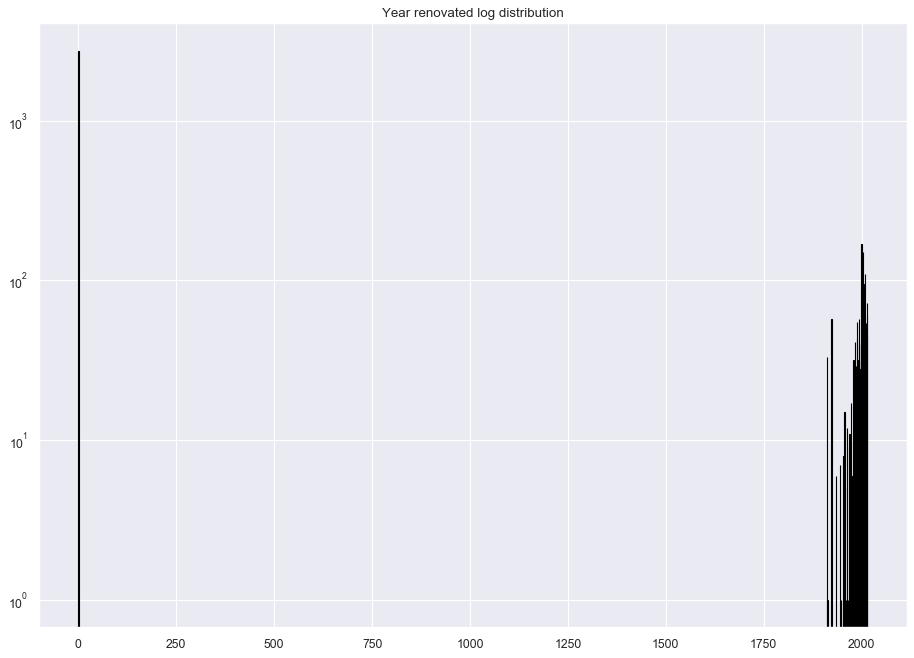

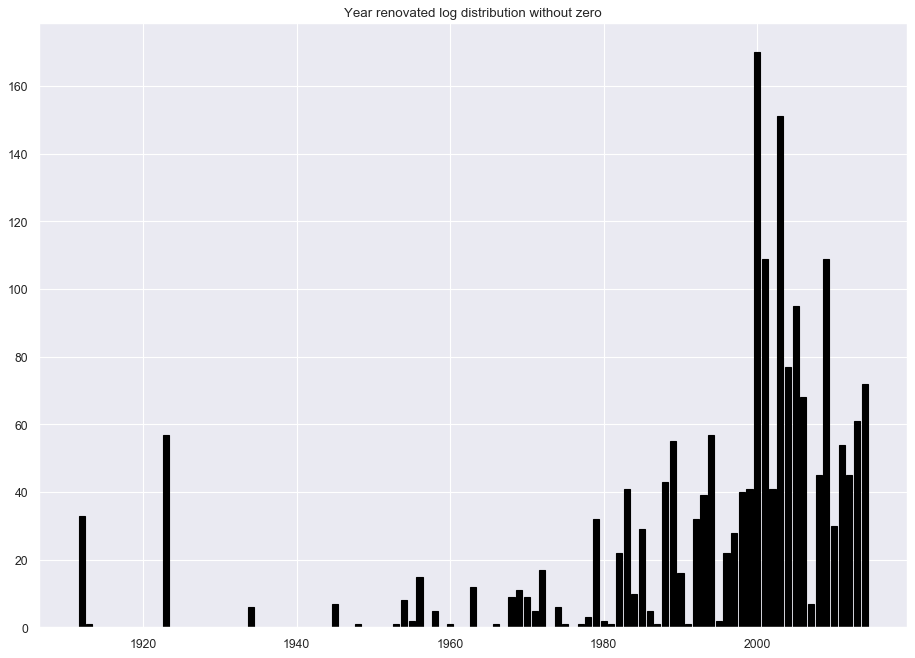

In [356]:
#Year renovated visualization
yr_ren_val_count = data.yr_renovated.value_counts()
plt.bar(yr_ren_val_count.index,yr_ren_val_count.values,log=True,color='black',edgecolor='black')
plt.title('Year renovated log distribution')
plt.show()

It appears that some of the houseds has not been renovated at all. The distribution of year renovated may confuse the mode. It seems reasonable to create a new variable that would comprise the meaning of both features.
House age feature will determine the amount of years since the house was built or renovated if it ever has been.

In [366]:
#Year renovated visualization without zero balues
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
yr_ren_val_count = yr_ren_val_count.drop(index = 0)
plt.bar(yr_ren_val_count.index,yr_ren_val_count.values,color='black',edgecolor='black')
plt.title('Year renovated log distribution without zero')
plt.show()


KeyError: '[0] not found in axis'

<Figure size 1120x800 with 0 Axes>

In [323]:
#Function for creating house age feature
def house_age(year_built,year_renovated):
    '''This function takes two arguments: 
    columns year built and year renovated 
    and defines how much time passed since 
    the house was built or renovated'''
    diff = []
    for i in range(0,len(year_built)):
        if year_renovated[i] == 0:
            diff.append(2020-year_built[i])
        else:
            diff.append(2020-year_renovated[i])
    return diff
print('Success')

Success


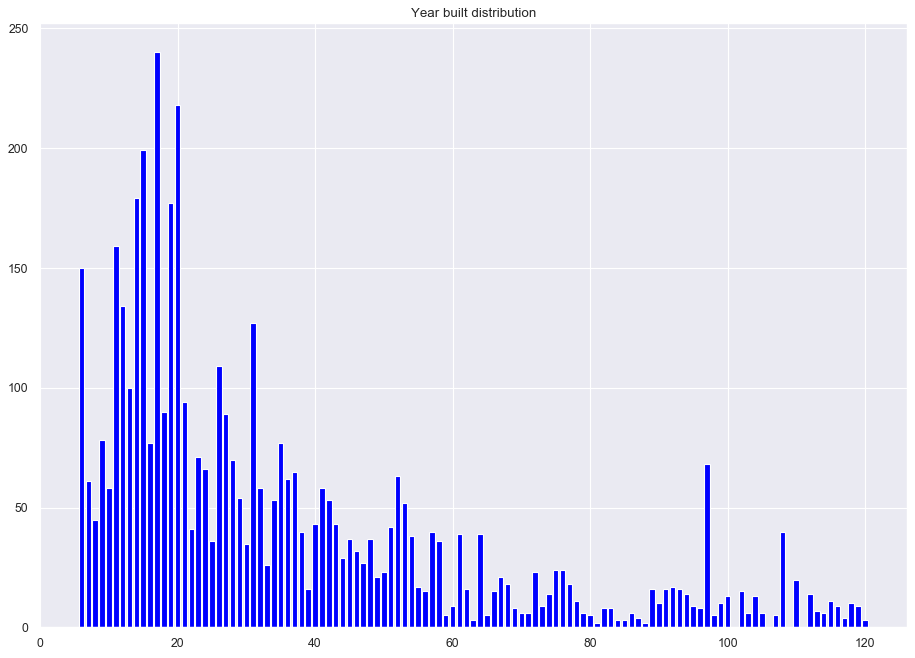

In [324]:
#The coulumn house_age in data will show the number of years passed since the house was built or renovated
age = house_age(data.yr_built,data.yr_renovated)
data['house_age'] = age

house_age_val_count = data.house_age.value_counts()
plt.bar(house_age_val_count.index,house_age_val_count.values,color = 'blue')
plt.title('Year built distribution')
plt.show()

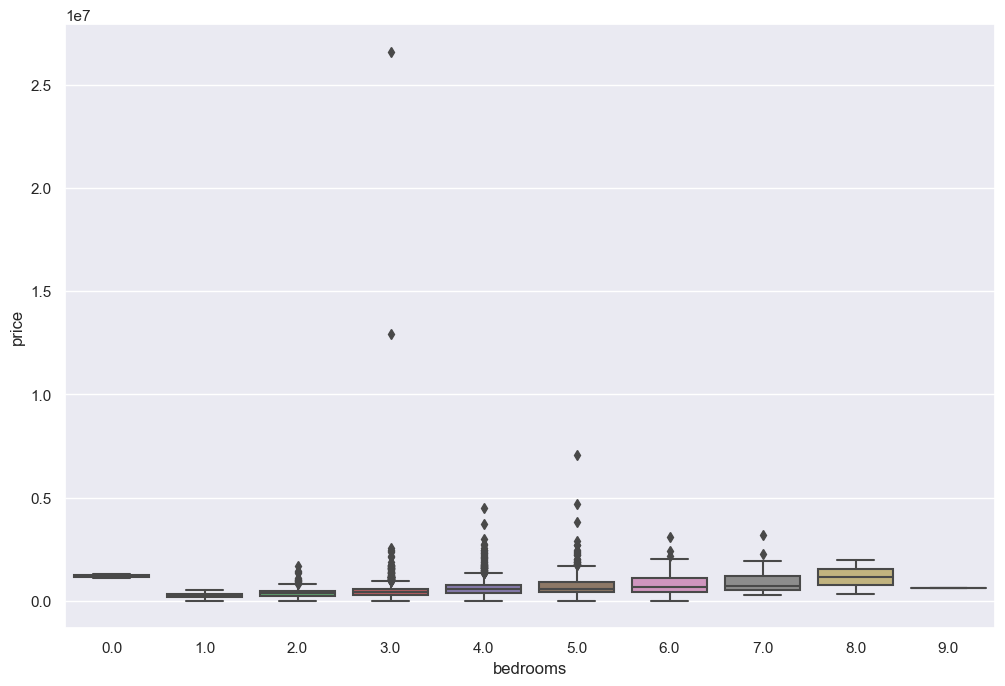

In [380]:
#Looking at price destribution
#Distribution of price by number of bedrooms is the most interesting. 
sns.boxplot(data = data, x = 'bedrooms', y = 'price')
plt.title("Boxplot of bedrooms distribution")
plt.show()

It looks like the data have some outliers which may affect the model significantly. These are exceptional houses that cost much more that the regular ones and don't differ with features presented here.

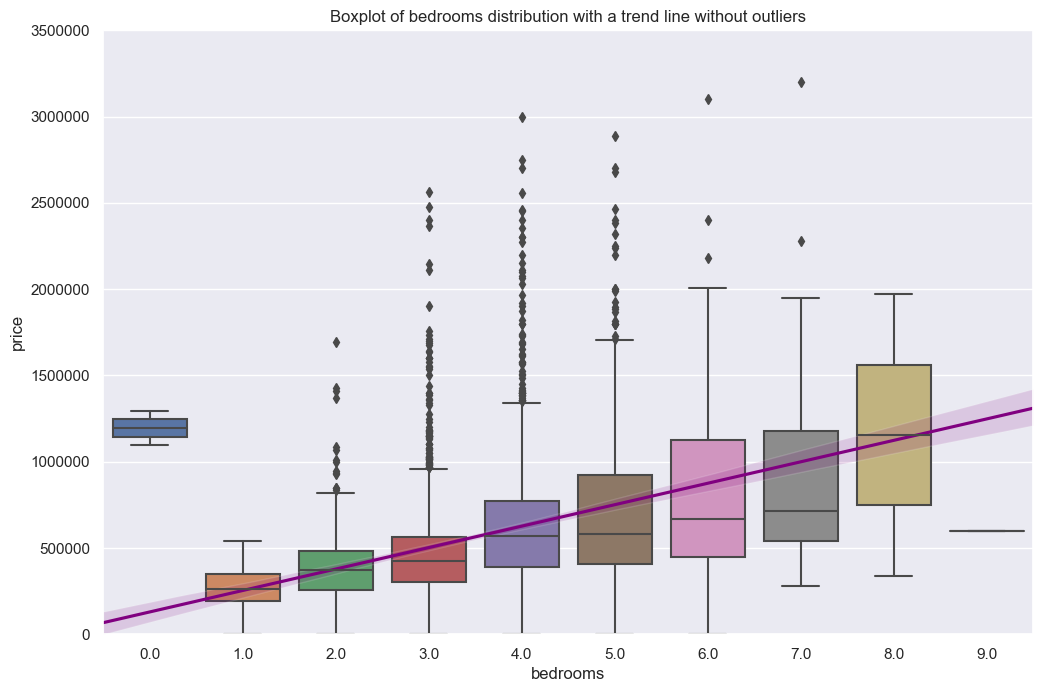

In [384]:
#Looking at price destribution
#Distribution of price by number of bedrooms is the most interesting. 
fig, ax = plt.subplots()
sns.boxplot(data = data, x = 'bedrooms', y = 'price', ax = ax)
sns.regplot(data = data, x = 'bedrooms', y = 'price', ax = ax, scatter = False, color = 'purple')
plt.title("Boxplot of bedrooms distribution with a trend line without outliers")
plt.ylim(0,3500000)
plt.show()

Removing just  a few outliers from the plot gives a sifnificantly better picture. 
Number of bedrooms shows a stable linear increase with the price increase. It looks like this may be a stong predictor for our future Regression Tree.
However, there are strange houses with 0 bedrooms which seems to violate the linear relationships completely which will be further investigated.

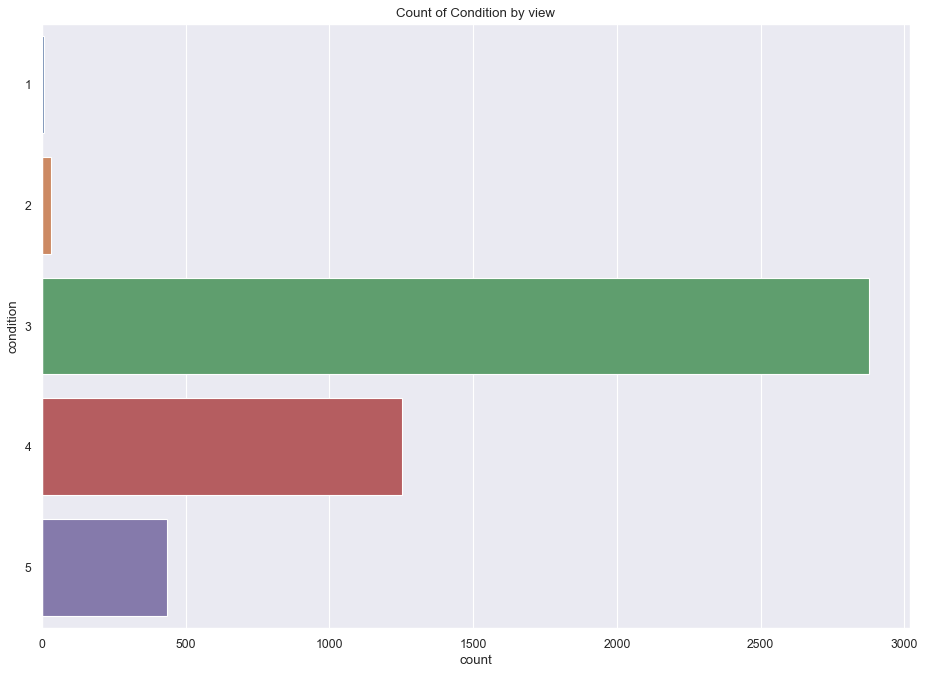

In [326]:
#Seaborn count plot of condition
sns.countplot(data=data, y="condition")
plt.title('Count of Condition by view')
plt.show()

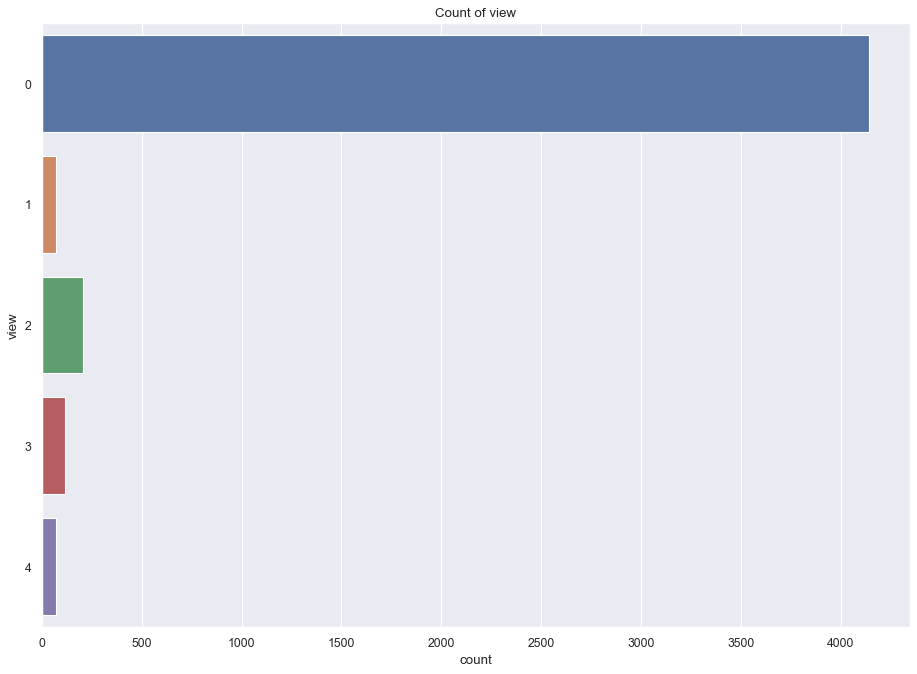

In [327]:
#Seaborn count plot of view
sns.countplot(data=data, y="view")
plt.title('Count of view')
plt.show()

Here 0 most likely represents the missing data and not the complete absence of view.
Since this feature has so many missing values it's not very informative and Regression Tree is unlikely to split on this feature so it looks like I may as well delete it. However I have enough machine power to process this feature and let the model decide.

In [329]:
#Exploring dates
print('min date is',min(data.date))
print('max date is',max(data.date))
#Since our timeframe too short to explore house price changes by season we'll not consider dates in this project

min date is 2014-05-02 00:00:00
max date is 2014-07-10 00:00:00


In [330]:
#Exploring anomalies

# 0 bedrooms
print('Unique number of bedrooms in a house')
print(np.sort(pd.unique(data.bedrooms)))
print('\n'*2)
#It looks like we have 0 bedrooms in some houses
print('Detailed view of those with 0 bedrooms')
print(data[data.bedrooms == 0])
print('\n'*2)
# Countries
print('Countries of houses\' location')
print(pd.unique(data.country)) 
#The country is always USA so we can remove this variable
print('\n'*2)
# states
print('States of houses\' location')
print(pd.unique(data.state)) 
#The state is always WA so we can remove this variable
print('\n'*2)
# Streets
print('There are',data.street.value_counts().count(),'unique streets in our dataset')

Unique number of bedrooms in a house
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]



Detailed view of those with 0 bedrooms
           date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1305 2014-06-12  1095000.0       0.0        0.0         3064      4764   
2891 2014-06-24  1295648.0       0.0        0.0         4810     28008   

      floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
1305     3.5          0     2          3        3064              0      1990   
2891     2.0          0     0          3        4810              0      1990   

      yr_renovated            street     city  statezip country state    zip  \
1305          2009     814 E Howe St  Seattle  WA 98102     USA    WA  98102   
2891          2009  20418 NE 64th Pl  Redmond  WA 98053     USA    WA  98053   

      cost of living index  house_age  
1305                1.0000         11  
2891                0.9987         11  



Countries of houses' location
['USA']



States of houses'

Since we are not going to do geographic analysis here we can remove the street variable as it's not going to work as factor in this case besides we have zip code feature and cost of living index feature created on its bases which encapsulates all the geographic location features of the house in one.

In [331]:
# Cleaning
# Dropping columns and rows
#data['bath_bed'] = data.bathrooms*data.bedrooms
data = data.drop(data[data.bedrooms == 0].index,axis=0) 
data = data.drop(data[data.price>10_000_000].index,axis=0)
data = data.drop(['date','statezip','street','country',
                  'state','zip','yr_built','yr_renovated',
                  'city'],axis=1)

#As the gap in the index was created we'll need to reset index
data.reset_index(inplace=True,drop=True)


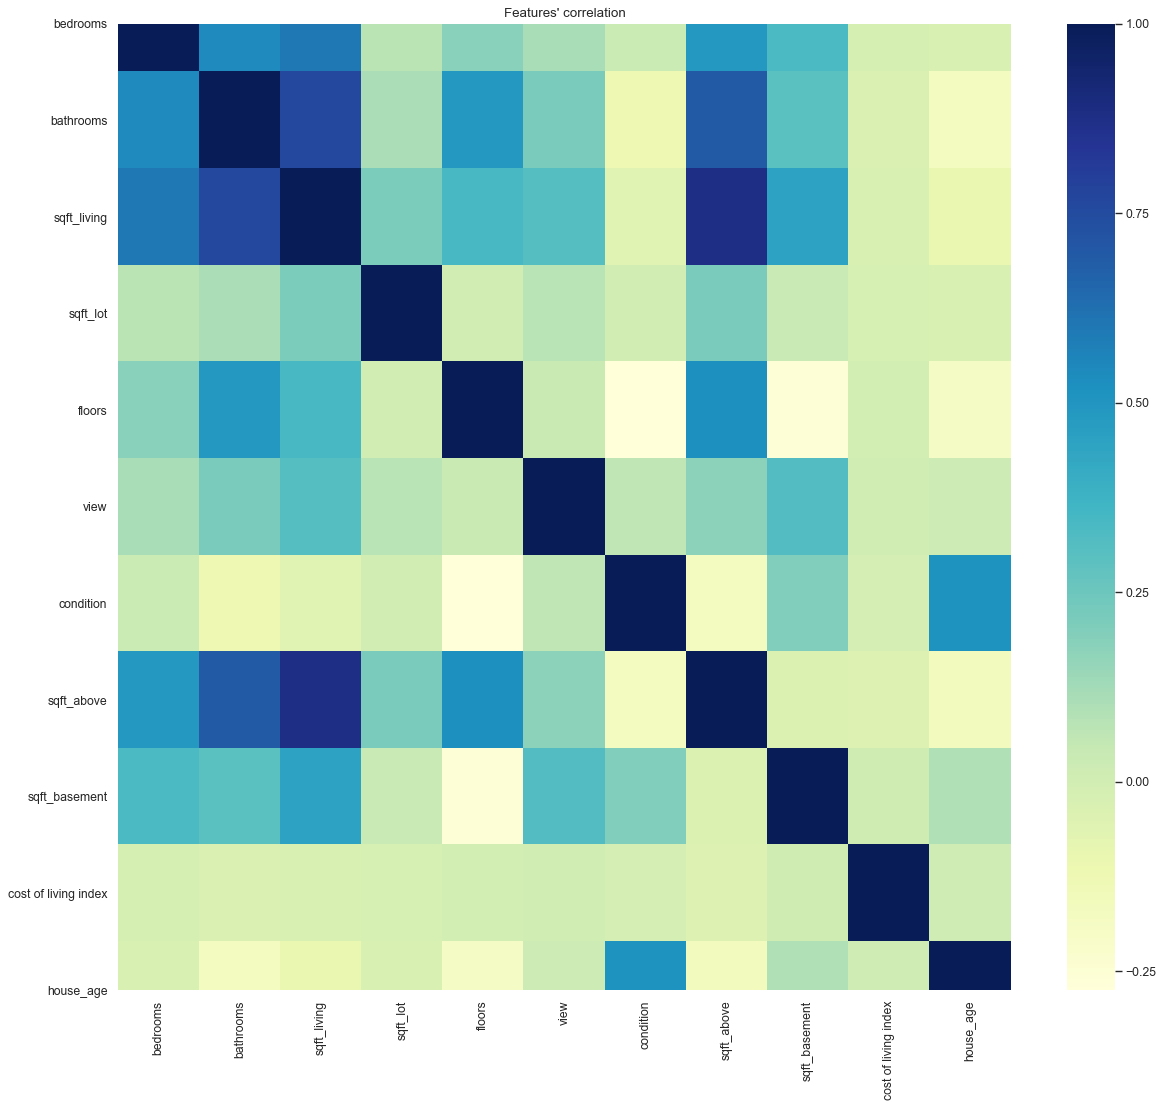

In [297]:
#Checking correlation of features
data1=data.drop('price',axis=1)
sns.heatmap(data1.corr(),cmap="YlGnBu")
plt.title('Features\' correlation' )
plt.show()

There are some variables with significant statistical correlation such as: sqft_living & bathrooms, sqft_living & bedrooms, bathrooms & bedrooms, sqft_living & sqft_above. 
One of the advantages of Regression trees is that variables with high correlation will be discarded by the model during node splitting. Also there's no need to include interaction terms which is perfectly illusntrated in this example https://rpubs.com/scottifer8/296739


# Model building step

## Splitting the data

In [222]:
#Importing neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
print('Libraries successfully imported')

Libraries successfully imported


In [223]:
#Splitting the data
X=data.drop('price',axis=1)
y=data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [225]:
from datetime import datetime
import time

#displaying time

def display_time (start,end):
    '''This function prints time in hours, minutes and seconds'''
    if (end-start)>3600:
        hours = (end-start)//3600
        minutes = (end-start)%3600
        seconds = (end-start)%60
        print('Time needed for execution is',
              hours,' hours ',minutes,' minutes ',round(seconds),' seconds')
    elif (end-start)>60:
        minutes = (end-start)//60
        seconds = (end-start)%60
        print('Time needed for execution is',
              minutes,' minutes ',round(seconds),' seconds')
    else :
        seconds = end-start
        print('Time needed for execution is',
              round(seconds),' seconds')
    


## Building the DecisionTreeRegressor

In [226]:
#Instantiating the model
dt = DecisionTreeRegressor(random_state=33) #criterion = 'mae'

#Creating parameter grid
max_depth = [int(x) for x in np.linspace(4, 11, num = 8)]
min_samples_split = [int(x) for x in nplinspace(10, 80, num = 8)]

params_dt = {   'max_depth': max_depth,
                'max_features':['auto','sqrt'],
                'min_samples_leaf':[0.05,0.025,0.015,0.01,0.005,0.0035],
                'min_samples_split':min_samples_split}
print('Done')

Done


In [227]:
#Instantiating the Grid Search
grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring='neg_mean_squared_error',
                       cv=4,
                       n_jobs=-1,)


In [228]:
#Training the model
start=time.time()

grid_dt.fit(X_train,y_train)

print("Best hyperparameters:\n", grid_dt.best_params_)

best_model = grid_dt.best_estimator_
best_score = grid_dt.best_score_
y_pred=best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

display_time(start,end)


print('Ended on',datetime.fromtimestamp(end).strftime("%B %d, %I:%M:%S"))

Best hyperparameters:
 {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 75}
RMSE of dt: 242542.25
MAE of dt: 146088.18
Time needed for execution is 11  seconds
Ended on October 30, 04:19:23


start = time.time()
RMSE_train = []
RMSE_test = []
MAE_test = []
    
for i in range(100):

    #Splitting the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    #training model
    grid_dt.fit(X_train,y_train)
    #extracting parameters
    best_model = grid_dt.best_estimator_
    best_score = grid_dt.best_score_
    y_pred=best_model.predict(X_test)
    rmse_test = MSE(y_test,y_pred)**0.5
    mae_test = MAE(y_test,y_pred)
    RMSE_train.append((-best_score)**0.5)
    RMSE_test.append(rmse_test)
    MAE_test.append(mae_test)
    print(i)

print('The average test MAE is ', np.mean(MAE_test))
print('The average training RMSE is ', np.mean(RMSE_train))
print('The average test RMSE is ', np.mean(RMSE_test))
print('The maximum test RMSE is ', max(RMSE_test))
print('The minimum test RMSE is ', min(RMSE_test))

end=time.time()
display_time(start,end)
print('Ended on',datetime.fromtimestamp(end).strftime("%B %d, %I:%M:%S"))

#With accepted features (House age,cost of living index,without outliers)

#The average test MAE is  147997.16914005612
#The average training RMSE is  251616.60608474005
#The average test RMSE is  252927.76879291434
#The maximum test RMSE is  301797.8829299676
#The minimum test RMSE is  206247.3313316991


#with features view and condition

The average test MAE is  146584.07863802026
The average training RMSE is  251948.01742759586
The average test RMSE is  250727.46028891215
The maximum test RMSE is  302071.59274796146
The minimum test RMSE is  203687.7943825271
Time needed for execution is 12.0  minutes  16  seconds
Ended on October 30, 03:36:49

without view
The average test MAE is  151576.97872006104
The average training RMSE is  254491.86247953319
The average test RMSE is  259436.60939533624
The maximum test RMSE is  302649.43214218033
The minimum test RMSE is  205894.89261285178
Time needed for execution is 11.0  minutes  56  seconds
Ended on October 30, 03:53:16

without view and condition
The average test MAE is  150467.9832859309
The average training RMSE is  254865.49908844303
The average test RMSE is  257764.3263373744
The maximum test RMSE is  305991.1014430061
The minimum test RMSE is  212219.51998174688
Time needed for execution is 11.0  minutes  52  seconds
Ended on October 30, 04:35:32


In [ ]:
#With features


In [638]:
RMSE_test.reshape(1,100)

AttributeError: 'list' object has no attribute 'reshape'

In [594]:
without_feature = [247]
with_feature = [241,258,244,263,230,239,267,213]
print('with feature',np.mean(with_feature),
'without feature',np.mean(without_feature))

with feature 244.375 without feature nan


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [803]:
#Let's explore the underfitting and overfitting
#fitting and predicting
#dt.fit(X_train,y_train)
y_pred_train = best_model.predict(X_train)
mse_dt = MSE(y_train,y_pred_train)
rmse_dt = mse_dt**0.5
print('Square root of the Mean Squared error:{:.2f}'.format(rmse_dt))

Square root of the Mean Squared error:231298.08


In [804]:
#Cross validation
MSE_CV_scores = -cross_val_score(best_model, X_train,y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 260461.75


In [318]:
#fitting and predicting
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(y_pred,y_test)
rmse_dt = mse_dt**0.5
print('Square root of the Mean Squared error:{:.2f}'.format(rmse_dt))

Square root of the Mean Squared error:313226.86


# This random forest has no hyperparameters tuned think about that when comes to this part

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


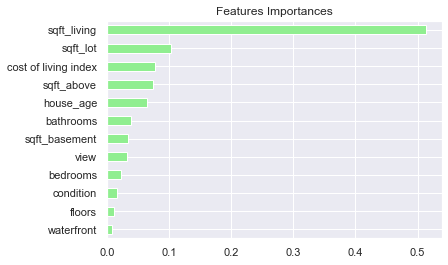

In [805]:
#visualizing feature importance ()
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()

## Ensembling with Random Forsest

In [807]:
#Instantiating Random Forest 
rf=RandomForestRegressor()

#Creating parameter grid
n_estimators = [int(x) for x in np.linspace(600, stop = 900, num = 4)]
max_depth = [int(x) for x in np.linspace(12, 16, num = 5)]

params_rf = {'n_estimators': n_estimators,
                 'max_depth': max_depth,
                'max_features':['auto','sqrt'],
                'min_samples_leaf':[0.005,0.0025,0.0015,0.001,0.0005],
                'min_samples_split':[7,10,12,15,20]}


Done


In [808]:
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=4,
                       verbose=1,
                       n_jobs=4 )
print('Done')

Done


In [801]:
#Training the model
start = time.time()
grid_rf.fit(X_train,y_train)
print("Best hyperparameters:\n", grid_rf.best_params_)
best_model = grid_rf.best_estimator_
y_pred=best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**0.5
mae = MAE(y_test,y_pred)
print('RMSE of rf: {:.2f}'.format(rmse_test))
print('MAE of rf: {:.2f}'.format(mae))
end = time.time()

display_time(start,end)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 10.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 23.2min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 30.8min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 40.6min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 53.1min
[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed: 66.5min finished


Best hyperparameters:
 {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 0.001, 'min_samples_split': 20, 'n_estimators': 800}
RMSE of rf: 202597.39
MAE of rf: 123424.22
Time needed for execution is 1.0  hours  395.57879662513733  minutes  36  seconds


### Tuning Random Forest

In [809]:
from sklearn.model_selection import RandomizedSearchCV

randomiz_rf = RandomizedSearchCV(estimator=rf,
                                 param_distributions=params_rf,
                                 n_iter=100,
                                scoring='neg_mean_squared_error',
                                 cv=4,
                                 verbose=1,
                                 n_jobs=4)

randomiz_rf.fit(X_train,y_train)
print("Best hyperparameters:\n", randomiz_rf.best_params_)
best_model = randomiz_rf.best_estimator_
y_pred=best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)
print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

Success
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  6.4min finished


Best hyperparameters:
 {'n_estimators': 800, 'min_samples_split': 7, 'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 14}
RMSE of dt: 217261.32
MAE of dt: 137931.97


## Boosting with Adaboost

In [810]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
dt = DecisionTreeRegressor()

n_estimators = [int(x) for x in np.linspace(50,400,num=8)]
learning_rate = [round(x,3) for x in np.logspace(0,-3,num=10)]
param_dist = {
 'n_estimators': n_estimators,
 'learning_rate' : learning_rate,
 'loss' : ['linear', 'square', 'exponential']
 }

ada_rand = RandomizedSearchCV(AdaBoostRegressor(),
                             param_distributions = param_dist,
                              scoring='neg_mean_squared_error',
                             cv=4,
                              verbose=2,
                             n_iter = 100,
                             n_jobs=-1)


In [811]:
#fitting and determining the best estimator 

start = time.time()
ada_rand.fit(X_train, y_train)

print("Best hyperparameters:\n", ada_rand.best_params_)

best_model = ada_rand.best_estimator_
y_pred=best_model.predict(X_test)

rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

print('\n')
display_time(start,end)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.2min finished


Best hyperparameters:
 {'n_estimators': 50, 'loss': 'square', 'learning_rate': 0.002}
RMSE of dt: 242047.56
MAE of dt: 160046.04


Time needed for execution is 2.0  minutes  13  seconds


## Boosting with Gradient Boosting

In [813]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

#setting up parameter grid
n_estimators = [int(x) for x in np.linspace(50,400,num=8)]
learning_rate = [round(x,3) for x in np.logspace(0,-3,num=10)]
max_depth = [int(x) for x in np.linspace(5,10,num=6)]

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01, 0.005, 0.001],
              'subsample':[0.7,0.8,0.9],
              'n_estimators': n_estimators,
              'max_depth':max_depth,
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[0.005,0.0035,0.0025,0.0015,0.001],
            'min_samples_split':[10,15,20,25]}

In [814]:
rand_gbr = RandomizedSearchCV(estimator=gbr,
                             param_distributions=param_grid,
                             scoring='neg_mean_squared_error',
                             cv=4,
                              verbose=2,
                             n_iter = 1000,
                             n_jobs=4)

In [815]:
start = time.time()
rand_gbr.fit(X_train, y_train)

print("Best hyperparameters:\n", rand_gbr.best_params_)

best_model = rand_gbr.best_estimator_
y_pred=best_model.predict(X_test)

rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

print('\n')
display_time(start,end)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   34.7s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed: 15.2min finished


Best hyperparameters:
 {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 25, 'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 8, 'learning_rate': 0.05}
RMSE of dt: 219237.86
MAE of dt: 135039.67


Time needed for execution is 15.0  minutes  12  seconds


In [838]:
n_estimators = [int(x) for x in np.linspace(300,500,num=5)]


param_grid = {'learning_rate': [0.02,0.015,0.01,0.005,0.001],
              'n_estimators':n_estimators,
              'subsample':[0.7,0.8,0.9],
              'max_depth':[7,8,9],
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[0.004,0.0035,0.003,0.0025,0.0015],
            'min_samples_split':[7,10,15,20,25]}

In [839]:
grid_gbr = GridSearchCV(estimator=gbr,
                       param_grid=param_grid,
                       cv=4,
                        scoring='neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = 6,
                       )

In [ ]:
start = time.time()
grid_gbr.fit(X_train, y_train)

print("Best hyperparameters:\n", grid_gbr.best_params_)

best_model = grid_gbr.best_estimator_
y_pred=best_model.predict(X_test)

rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

print('\n')
display_time(start,end)

Fitting 4 folds for each of 11250 candidates, totalling 45000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  9.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 11.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 14.5min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 20.3min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 25.1min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 28.5min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 37.4min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 43.1min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 50.0min


In [813]:
end= time.time()
datetime.fromtimestamp(end).strftime("%B %d, %Y %I:%M:%S")

'May 06, 2020 03:00:50'

# Epic Ending here